In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:

data = {
 'Position': [
 'Business Analyst', 'Junior Consultant', 'Senior Consultant',
 'Manager', 'Country Manager', 'Region Manager',
 'Partner', 'Senior Partner', 'C-level', 'CEO'
 ],
 'Level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Salary': [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
}
df = pd.DataFrame(data)
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [19]:
features = df.iloc[:, 1:2].values
features

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [15]:
labels = df.iloc[:, 2:].values
labels

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

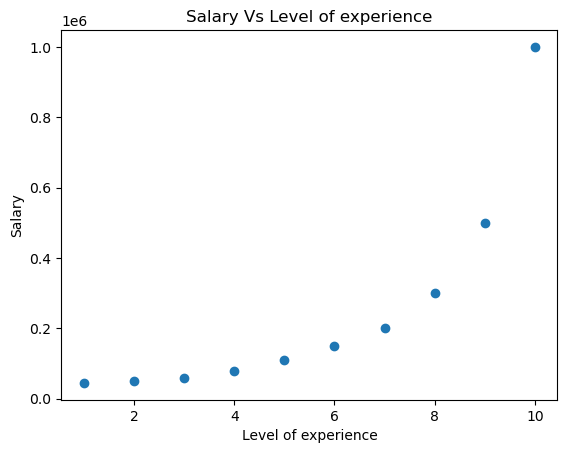

In [20]:
plt.scatter (features, labels)
plt.xlabel('Level of experience')
plt.ylabel('Salary')
plt.title('Salary Vs Level of experience')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [23]:
linreg = LinearRegression()
linreg.fit(features, labels)
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(features)
poly.fit(X_poly,labels)
linreg2 = LinearRegression()
linreg2.fit(X_poly,labels)


LinearRegression()

In [24]:
labels_pred = linreg.predict(features)
labels_pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [25]:
#R square value for linear regression
from sklearn.metrics import r2_score
r2 = r2_score(labels ,labels_pred)
r2


0.6690412331929895

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Assuming labels are your true values and labels_pred are your predicted values
rmse = np.sqrt(mean_squared_error(labels, labels_pred))
mae = mean_absolute_error(labels, labels_pred)
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')

RMSE: 163388.735
MAE: 128454.545


In [27]:
#prediction using polynomial regression
labels_pred2 = linreg2.predict(X_poly)
labels_pred2

array([[ 14902.09790211],
       [ 78759.90675991],
       [ 94960.37296037],
       [ 88223.77622377],
       [ 83270.3962704 ],
       [104820.51282051],
       [177594.40559441],
       [326312.35431236],
       [575694.63869464],
       [950461.53846153]])

In [28]:
#R square value using polynomial
from sklearn.metrics import r2_score
r2 = r2_score(labels ,labels_pred2)
r2

0.9812097727913367

In [29]:
labels


array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

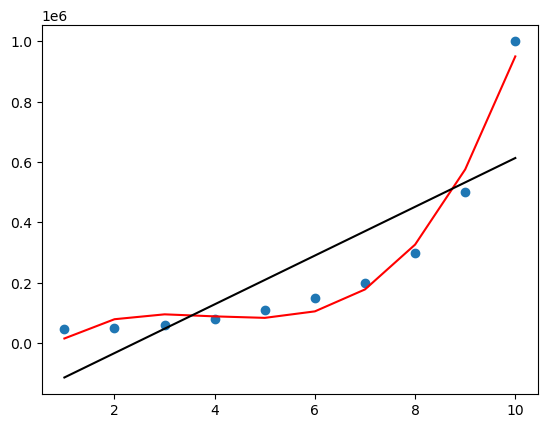

In [30]:
plt.scatter(features, labels)
plt.plot(features, labels_pred2, c='r')
plt.plot(features,labels_pred, c='black')
plt.show()

In [31]:
features = df['Position'].values
features

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [32]:
x1 = pd.DataFrame(features)
y1 = pd.DataFrame(labels_pred)
df1 = pd.concat([x1,y1], axis=1, keys=['Position','salary_pred_Lin'])
df1

,Position,salary_pred_Lin
,0,0
0,Business Analyst,-114454.545455
1,Junior Consultant,-33575.757576
2,Senior Consultant,47303.030303
3,Manager,128181.818182
4,Country Manager,209060.606061
5,Region Manager,289939.393939
6,Partner,370818.181818
7,Senior Partner,451696.969697
8,C-level,532575.757576


In [33]:
x1 = pd.DataFrame(features)
y1 =pd.DataFrame(labels_pred2)
df2 = pd.concat([x1,y1], axis=1, keys=['Position','salary_pred_poly'])
df2

,Position,salary_pred_poly
,0,0
0,Business Analyst,14902.097902
1,Junior Consultant,78759.906760
2,Senior Consultant,94960.372960
3,Manager,88223.776224
4,Country Manager,83270.396270
5,Region Manager,104820.512821
6,Partner,177594.405594
7,Senior Partner,326312.354312
8,C-level,575694.638695


In [34]:
pd.merge(df2,df1, how='inner')

,Position,salary_pred_poly,salary_pred_Lin
,0,0,0
0,Business Analyst,14902.097902,-114454.545455
1,Junior Consultant,78759.906760,-33575.757576
2,Senior Consultant,94960.372960,47303.030303
3,Manager,88223.776224,128181.818182
4,Country Manager,83270.396270,209060.606061
5,Region Manager,104820.512821,289939.393939
6,Partner,177594.405594,370818.181818
7,Senior Partner,326312.354312,451696.969697
8,C-level,575694.638695,532575.757576


In [35]:
linreg2.predict(poly.fit_transform([[8.5]]))

array([[436875.43706294]])

In [36]:
import numpy as np
linreg.predict(np.array([ [8.5] ]) )

array([[492136.36363636]])

In [38]:
'''import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Let's create a synthetic dataset for demonstration purposes
np.random.seed(42)
df = pd.DataFrame({'X': np.random.rand(100) * 10, 'y': 2 * np.random.rand(100) * 10 + np.random.randn(100) * 2})

# Split the data into features (X) and target values (y)
X = df[['X']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_predictions = linear_reg.predict(X_test)

# Polynomial Regression
degree = 2  # You can adjust the degree
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
poly_predictions = poly_reg.predict(X_poly_test)

# Compare the results
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_predictions))

linear_mae = mean_absolute_error(y_test, linear_predictions)
poly_mae = mean_absolute_error(y_test, poly_predictions)

print(f'Linear Regression RMSE: {linear_rmse:.2f}, MAE: {linear_mae:.2f}')
print(f'Polynomial Regression RMSE: {poly_rmse:.2f}, MAE: {poly_mae:.2f}')

# Visualize the results
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, linear_predictions, label='Linear Regression', color='red')
plt.plot(X_test, poly_predictions, label=f'Polynomial Regression (Degree {degree})', color='green')
plt.title('Linear vs Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()'''
'

SyntaxError: unterminated string literal (detected at line 55) (988065519.py, line 55)